In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
%load_ext autoreload
%autoreload 2

In [6]:
import glob
import pandas as pd
import numpy as np
from sglm.helpers import filehelpers as fh, dfhelpers as dfh
from pathlib import Path
from collections import defaultdict
from tqdm.notebook import tqdm, trange
import scipy.stats
import matplotlib.pyplot as plt
from sglm.helpers import filehelpers as fh, dfhelpers as dfh
import json

In [7]:
def update_max_min(mx_val, mn_val, new_val_mx, new_val_mn):
    mx_chg = new_val_mx > mx_val
    mn_chg = new_val_mn < mn_val
    
    ret_mx = new_val_mx if mx_chg else mx_val
    ret_mn = new_val_mn if mn_chg else mn_val
    return ret_mx, ret_mn, mx_chg, mn_chg

In [31]:
fg_lst = [
    'Figure_1_2',
    'Figure_3',
    'Figure_4_g1',
    'Figure_4_g2',
    'Figure_5_g1',
    'Figure_5_g2',
    'Figure_5_g5',
]

dff = {}
for fg in fg_lst:
    dfl = {}
    fig_file_search = str(Path(f'/Users/Josh/Documents/GitHub/sabatinilab-glm/sglm/outputs/final_outputs_rev-msesplt/{fg}*.json').resolve())
    for fg_file in glob.glob(fig_file_search):
        fl = Path(fg_file).parts[-1].split('.')[0]
        
#         jfile = str(Path('/Users/Josh/Documents/GitHub/sabatinilab-glm/sglm/outputs/final_outputs_rev-msesplt/Figure_1_2-mse_seg-gACH=0_base_simple.json').resolve())
        with open(fg_file) as f:
            jld = json.load(f)
        dfl[fl.replace(fg+'-', '').replace('mse_seg-', '')] = jld
        
    dff[fg] = dfl
    

In [50]:
import itertools

d_new = [[(k+' / '+kk, vv) for kk, vv in v.items()] for k,v in dff.items()]
# d_final = {}
# for k in 
dfff = pd.DataFrame({k: v for k, v in list(itertools.chain.from_iterable(d_new))}).T

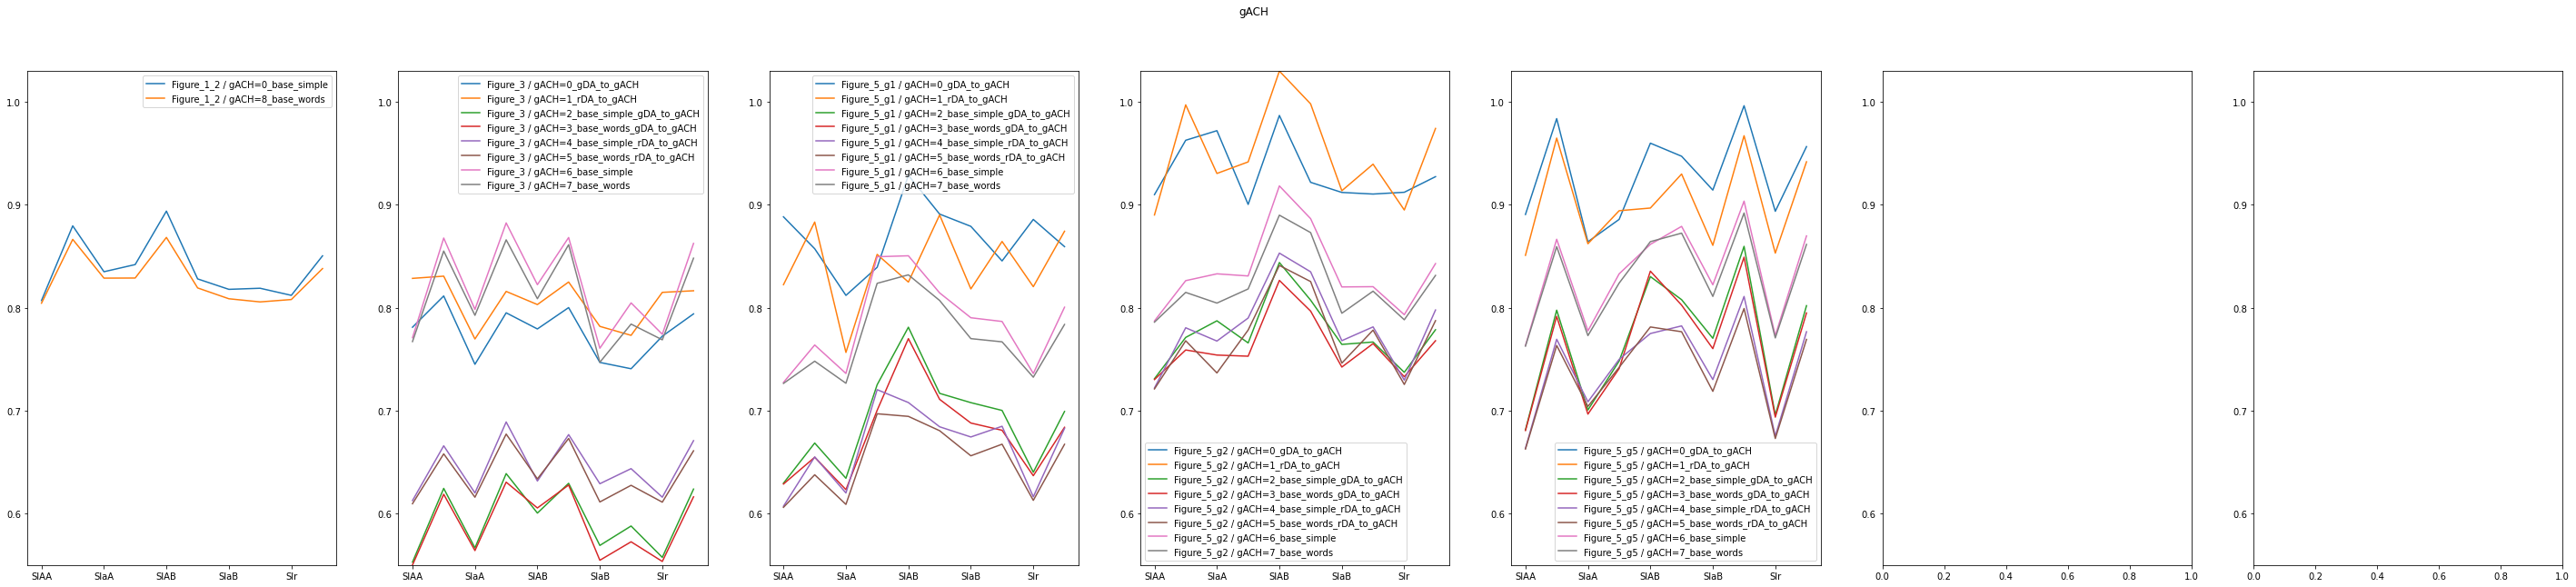

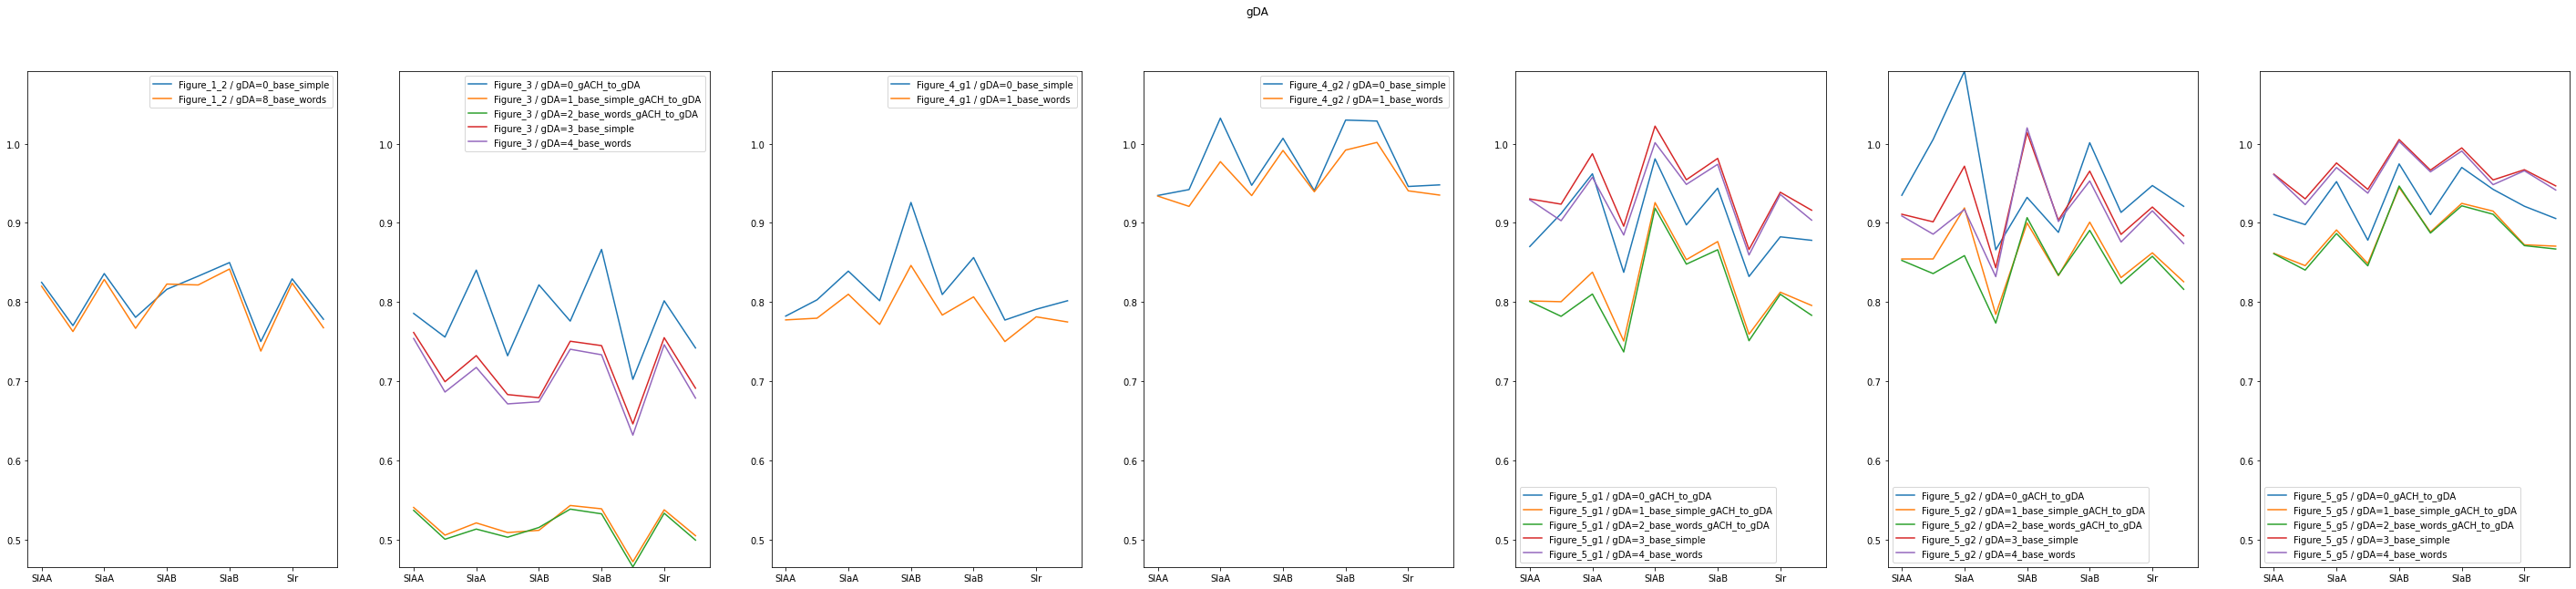

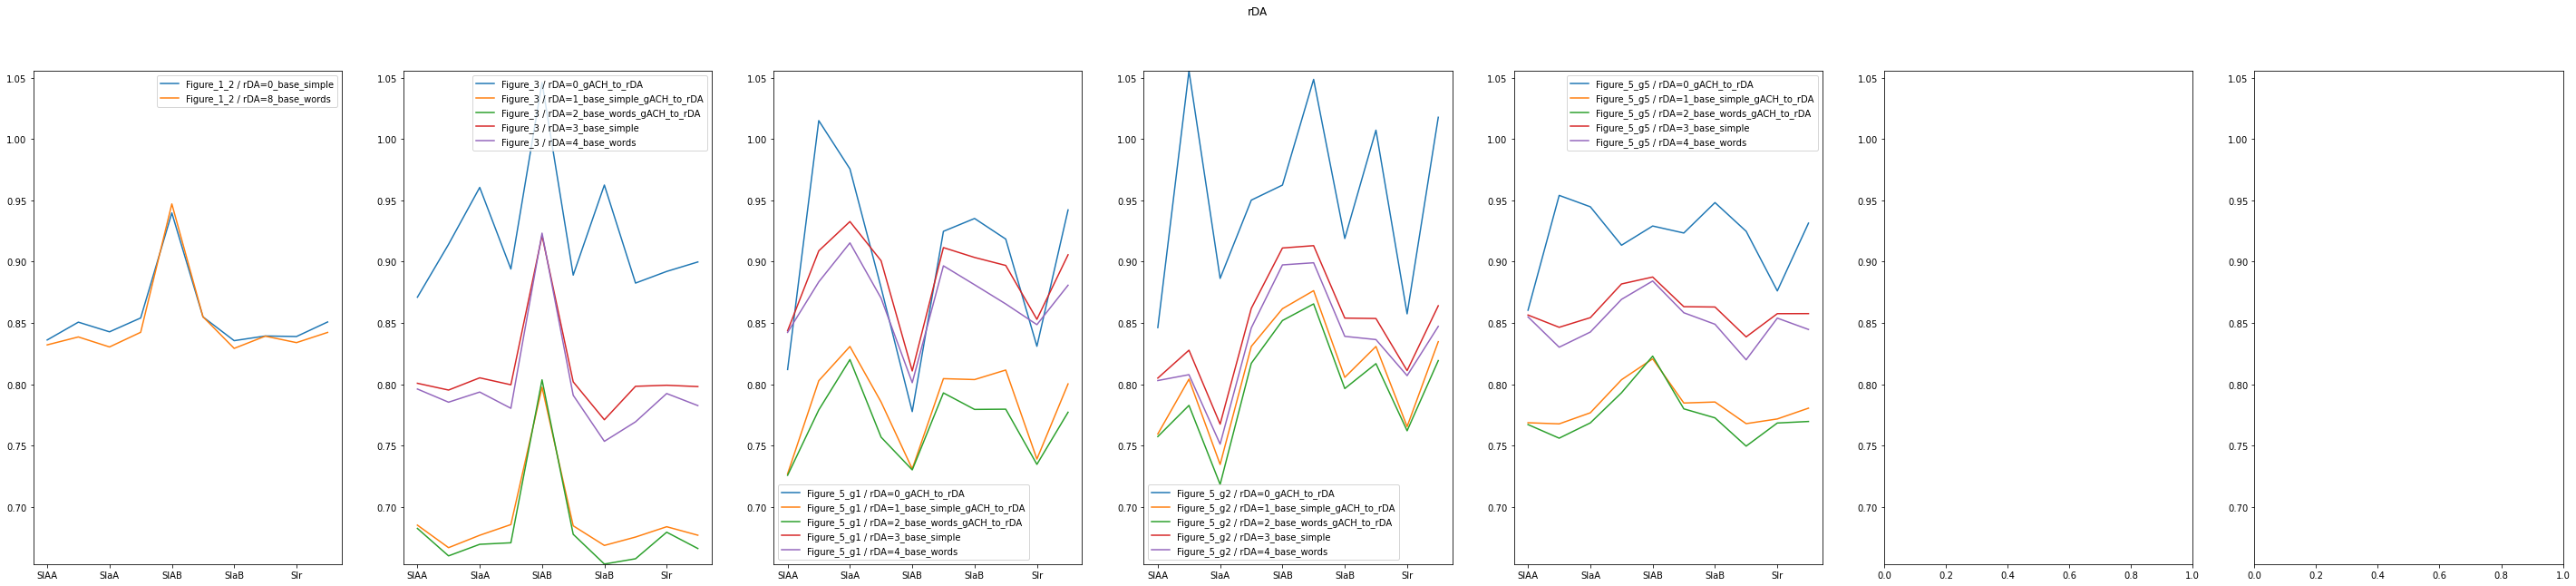

In [102]:
dfff['inx_splt'] = dfff.reset_index()['index'].str.split(' / ').values
dfff['fig'] = dfff['inx_splt'].apply(lambda x: x[0])
dfff['modl_base'] = dfff['inx_splt'].apply(lambda x: x[1])
dfff['modl'] = dfff['modl_base'].apply(lambda x: x.split('=')[1])
dfff['yc'] = dfff['modl_base'].apply(lambda x: x.split('=')[0])

for yc in dfff['yc'].unique():
    dfy = dfff.query(f'yc == "{yc}"')
    fig, axes = plt.subplots(1,7,figsize=(50,10))
    fig.set_facecolor('w')
    fig.suptitle(yc)
    
    mx_val, mn_val = -np.inf, np.inf
    for ifg, fg in enumerate(dfy['fig'].unique()):
        dfq = dfy.query(f'fig == "{fg}"')
        dfq_drp = dfq.drop(['inx_splt', 'fig', 'modl_base', 'modl', 'yc'], axis=1).T
        dfq_drp.plot(ax=axes[ifg])
        mx_val, mn_val, mx_chg, mn_chg = update_max_min(mx_val, mn_val, np.max(dfq_drp.values), np.min(dfq_drp.values))
    
    for ax in axes:
        ax.set_ylim(mn_val, mx_val)
        

In [109]:
dfff.set_index(['yc', 'fig', 'modl']).drop(['inx_splt', 'modl_base'], axis=1).sort_index().to_csv(r'C:\Users\Josh\Documents\GitHub\sabatinilab-glm\sglm\outputs\mse-by-event-alignment\mse_by_event_alignment.csv')